In [43]:
import pickle
import csv 
import numpy as np

In [44]:
embeddings = None
with open("./embeddings.pickle", "rb") as f:
    embeddings = pickle.load(f)

isExtrovert = {}
names = {}
with open("./people.csv", "r") as f:
    reader = csv.DictReader(f)
    for row in reader: 
        n = row["First Name"].strip() + " " + row["Last Name"].strip()
        ext_name = row["Extrovert/Introvert"].strip()
        isExtrovert[n] = ext_name == "Extrovert"

isExtrovert

{'Suthar Briyana': True,
 'Ashley (Lillian) Haverty': False,
 'Akshat Tewari': True,
 'Ethan Wellner': False,
 'Westin Smith': True,
 'Aarav Upadhyay': True,
 'Suvit Asnani': False,
 'Claire Liu': False,
 'Hairong (Amy) Wang': False,
 'Abhinav Gurajapu': False,
 'Christian Colangelo': True,
 'Emily Kim': False,
 'Shivali Sethi': False,
 'Edith Domanski': True,
 'Cole Tyler': True,
 'Audrey Wang': False,
 'Richard Nguyen': False,
 'Abhiansh Pathak': True,
 'Divyam Dave': True,
 'Surya Gedipudi': True,
 'Vinil Polepalli': True,
 'Steven Hernandez': False,
 'Kelly Yuan': False,
 'Ritwik Singh': True,
 'Abhijit Nair': False,
 'Aarthi Gunasekaran': True,
 'Alexander Lin': False,
 'Maria Huan': False,
 'Henry Cantor': False,
 'Ayon Hajra': False,
 'Hannah Nitka': True,
 'Remy Mander': True,
 'Anabelle Ahteck': False,
 'Michael Langman': True,
 'Vee Marinaccio': False,
 'Ayden Pinto': True,
 'Derek Wang': False,
 'Sunkalp Chandra': True,
 'Logan Mesh': False,
 'Gajan Mohan Raj': True,
 'John 

In [45]:
names = sorted(embeddings.keys())

extroverts = []
introverts = []
for n in names:
    if isExtrovert[n]:
        extroverts.append(n)
    else:
        introverts.append(n)

len(extroverts), len(introverts)

(20, 23)

In [46]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [47]:
arr = np.zeros((len(extroverts), len(introverts)))

for i, extrovert in enumerate(extroverts):
    for x, introvert in enumerate(introverts):
        similarity_score = 0
        if extrovert == introvert:
            similarity_score = 1
        else: 
            similarity_score = cosine_similarity(embeddings[extrovert], embeddings[introvert])

        arr[i][x] = similarity_score

arr

array([[ 0.38888457,  0.53756622,  0.28418046,  0.36005347,  0.45234426,
         0.30246176,  0.17891784,  0.29242754,  0.42854468,  0.35644882,
         0.30730745,  0.37491811,  0.42742308,  0.55749444,  0.1536955 ,
         0.27351679,  0.36866946,  0.27763195,  0.52074672,  0.29129408,
         0.1489251 ,  1.        ,  0.50663609],
       [ 0.26911868,  0.15276318,  0.22989084,  0.25721808,  0.16379701,
         0.23577102,  0.34268559,  0.12293964,  0.30437751,  0.20475709,
         0.43366826,  0.14500009,  0.35616212,  0.20460781,  0.36703669,
         0.26789565,  0.19274101,  0.36854034,  0.2954316 ,  0.31535826,
         0.38545737,  0.11659977,  0.28882335],
       [ 0.44564775,  0.31111403,  0.64893212,  0.3269083 ,  0.16587606,
         0.39065758,  0.73387135,  0.56197274,  0.32049026,  0.5460497 ,
         0.37433395,  0.22249699,  0.32548674,  0.37693963,  0.44068744,
         0.20304775,  0.34835093,  0.15703335,  0.37008096,  0.47196579,
         0.27732837,  0.2435

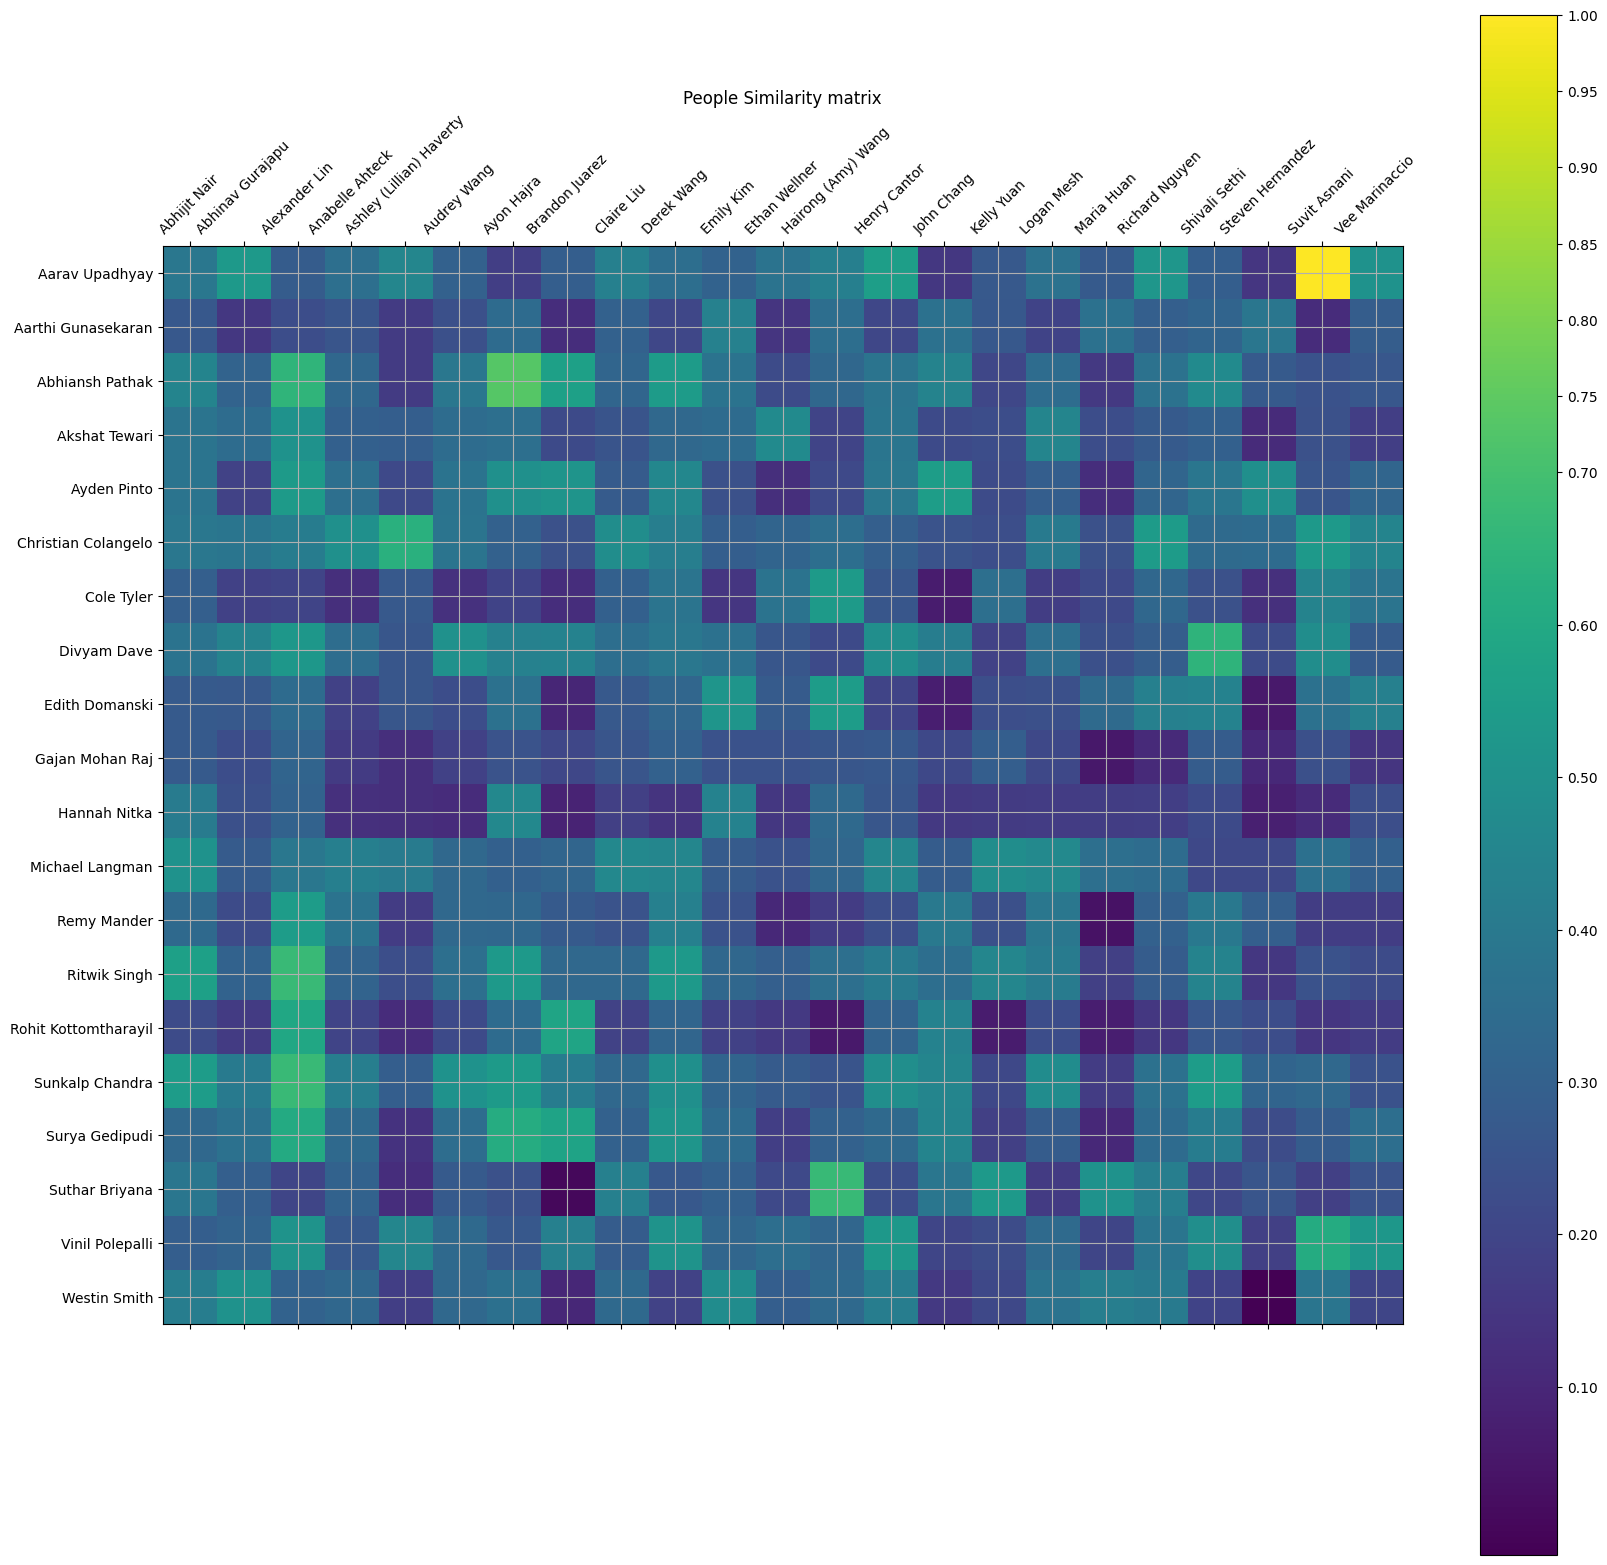

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(arr, interpolation='nearest')
ax.grid(True)
plt.title('People Similarity matrix')
plt.xticks(range(len(introverts)), introverts, rotation=45);
plt.yticks(range(len(extroverts)), extroverts);
fig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .75,.8,.85,.90,.95,1])
plt.show()